In [34]:
import pandas as pd
import numpy as np
import sys
sys.path.append('./data_preprocessing')
import os

if 'data_preprocessing' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/analysis/'
destination_folder_path = data_folder + 'trips/analysis/remove_outliers/'

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_day.csv')
trips

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-26,1,114.000000,15.000000,NaN,NaN,4.0,0.0,0.0
1,2018-01-27,8,2263.250000,14.250000,NaN,787.000000,5.0,1.0,0.0
2,2018-01-28,12,7208.666667,14.833333,NaN,1135.300000,6.0,1.0,0.0
3,2018-01-29,8,5821.875000,15.500000,NaN,195.500000,0.0,0.0,0.0
4,2018-01-30,69,3208.202899,16.144928,NaN,1248.483333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1551,2022-04-26,7014,2645.781152,13.606929,31.908143,2433.724705,1.0,0.0,0.0
1552,2022-04-27,7322,2684.503688,13.571019,31.709845,2404.509035,2.0,0.0,0.0
1553,2022-04-28,7192,2778.109844,13.484705,31.698189,2390.592556,3.0,0.0,0.0
1554,2022-04-29,5707,3267.835290,13.171894,31.182616,2308.744780,4.0,0.0,0.0


In [35]:
print(trips['number_of_trips'].isna().sum())
print(trips['tripduration'].isna().sum())
print(trips['distance'].isna().sum())

0
36
37


In [36]:
def remove_outliers(df, columns = []):
    if len(columns) == 0:
        columns = df.columns
    for column in columns:
        rolling_std = df[column].rolling(180).std()
        rolling_mean = df[column].rolling(30).mean()
        df.loc[df[column] > (rolling_mean + 2*rolling_std), column] = np.nan
        df.loc[df[column] < (rolling_mean - 2*rolling_std), column] = np.nan
    return df

In [37]:
trips_removed_number = remove_outliers(trips, ['number_of_trips'])

In [38]:
print(trips_removed_number['number_of_trips'].isna().sum())

57


In [39]:
trips_removed_duration = remove_outliers(trips, ['tripduration'])

In [40]:
print(trips_removed_duration['tripduration'].isna().sum())

75


In [41]:
trips_removed_distance = remove_outliers(trips, ['distance'])
print(trips_removed_distance['distance'].isna().sum())

48


In [42]:
trips_removed = remove_outliers(trips, ['number_of_trips', 'tripduration',
                                        'distance'])
print(trips_removed['number_of_trips'].isna().sum())
print(trips_removed['tripduration'].isna().sum())
print(trips_removed['distance'].isna().sum())

57
75
48


In [43]:
trips_removed

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-26,1.0,114.000000,15.000000,NaN,NaN,4.0,0.0,0.0
1,2018-01-27,8.0,2263.250000,14.250000,NaN,787.000000,5.0,1.0,0.0
2,2018-01-28,12.0,7208.666667,14.833333,NaN,1135.300000,6.0,1.0,0.0
3,2018-01-29,8.0,5821.875000,15.500000,NaN,195.500000,0.0,0.0,0.0
4,2018-01-30,69.0,3208.202899,16.144928,NaN,1248.483333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1551,2022-04-26,7014.0,2645.781152,13.606929,31.908143,2433.724705,1.0,0.0,0.0
1552,2022-04-27,7322.0,2684.503688,13.571019,31.709845,2404.509035,2.0,0.0,0.0
1553,2022-04-28,7192.0,2778.109844,13.484705,31.698189,2390.592556,3.0,0.0,0.0
1554,2022-04-29,5707.0,3267.835290,13.171894,31.182616,2308.744780,4.0,0.0,0.0


In [44]:
trips_removed.to_csv(destination_folder_path + 'trips_grouped_by_day.csv', index=False)

In [45]:
covid = pd.read_csv(data_folder + 'covid/treated_data/data.csv')
covid

,date,new_cases_ma,new_deaths_ma
0,2020-03-06,2.0,NaN
1,2020-03-07,2.0,NaN
2,2020-03-08,3.0,NaN
3,2020-03-09,3.0,NaN
4,2020-03-10,4.0,NaN
...,...,...,...
889,2022-08-12,21952.0,214.0
890,2022-08-13,19565.0,188.0
891,2022-08-14,18537.0,180.0
892,2022-08-15,20351.0,199.0


In [46]:
print(covid['new_cases_ma'].isna().sum())
print(covid['new_deaths_ma'].isna().sum())
covid_removed = remove_outliers(covid, ['new_cases_ma', 'new_deaths_ma'])
print(covid_removed['new_cases_ma'].isna().sum())
print(covid_removed['new_deaths_ma'].isna().sum())

14
29
14
30


In [47]:
covid_removed.to_csv(data_folder + 'covid/without_outliers/data.csv', index=False)

In [48]:
trips

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-26,1.0,114.000000,15.000000,NaN,NaN,4.0,0.0,0.0
1,2018-01-27,8.0,2263.250000,14.250000,NaN,787.000000,5.0,1.0,0.0
2,2018-01-28,12.0,7208.666667,14.833333,NaN,1135.300000,6.0,1.0,0.0
3,2018-01-29,8.0,5821.875000,15.500000,NaN,195.500000,0.0,0.0,0.0
4,2018-01-30,69.0,3208.202899,16.144928,NaN,1248.483333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1551,2022-04-26,7014.0,2645.781152,13.606929,31.908143,2433.724705,1.0,0.0,0.0
1552,2022-04-27,7322.0,2684.503688,13.571019,31.709845,2404.509035,2.0,0.0,0.0
1553,2022-04-28,7192.0,2778.109844,13.484705,31.698189,2390.592556,3.0,0.0,0.0
1554,2022-04-29,5707.0,3267.835290,13.171894,31.182616,2308.744780,4.0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f123c7fb450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f123c7fba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f123c86dad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f123c80d190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f123c80d4d0>],
 'means': []}

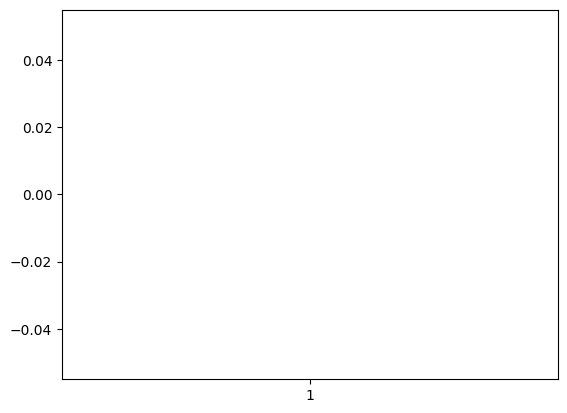

In [50]:
import matplotlib.pyplot as plt
plt.boxplot(trips['number_of_trips'])